In [19]:
import pandas as pd

df = pd.read_csv('bikebuyers_original.csv')
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [20]:
df.head()

,ID,Marital Status,Gender,Income,Children,Cars,Age,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,40000,0,1,42,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,70000,0,1,38,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,70000,0,1,43,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,60000,4,3,42,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,60000,3,2,66,Bachelors,Management,No,1-2 Miles,North America,No


In [22]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df.Income, df.Region)
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2     meandiff  p-adj   lower      upper    reject
-------------------------------------------------------------------------
       Europe North America 22449.8688   0.0   17438.99 27460.7476   True
       Europe       Pacific    23275.0   0.0 16914.7819 29635.2181   True
North America       Pacific   825.1312 0.941 -5004.8513  6655.1137  False
-------------------------------------------------------------------------


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Cars              1000 non-null   int64 
 6   Age               1000 non-null   int64 
 7   Education         1000 non-null   object
 8   Occupation        1000 non-null   object
 9   Home Owner        1000 non-null   object
 10  Commute Distance  1000 non-null   object
 11  Region            1000 non-null   object
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


Distinguish numerical from categorical variables (columns). NOTE: Even if columns have numbers, they may in fact be categorical. Why?


Numerical variables represent continuous or discrete quantities, like income or age, while categorical variables represent distinct groups, such as gender or occupation. Even if a column contains numbers, it can be categorical if the numbers represent categories (e.g., 1 for male, 2 for female). Categorial variables within this can include: Marital Status, Gender, Occupation, Home Owner, Region, and Purchased Bike.


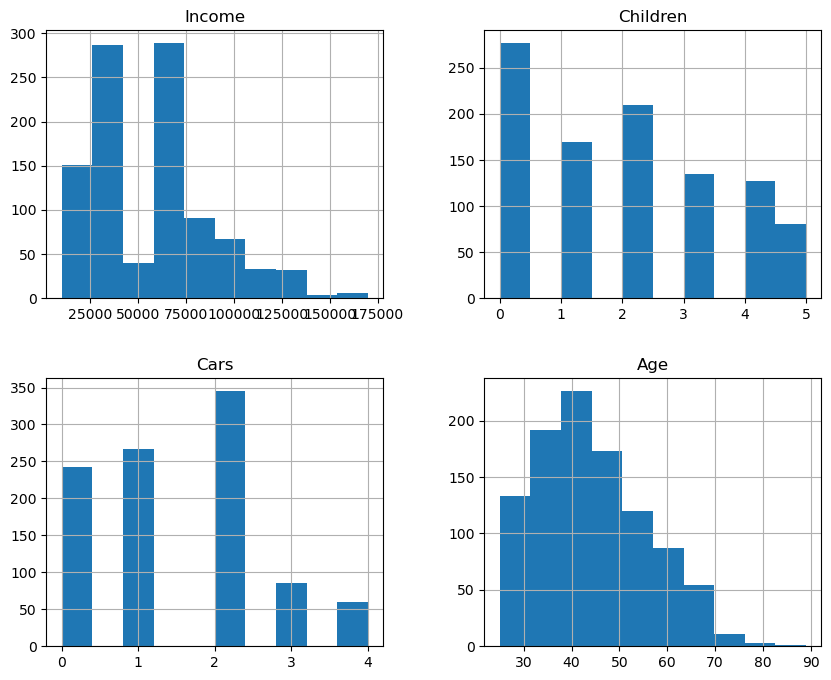

In [3]:
import matplotlib.pyplot as plt

df[['Income', 'Children', 'Cars', 'Age']].hist(figsize=(10, 8)) #made the figsize larger to better visualize the data
plt.show()


In [4]:
df[['Income', 'Children', 'Cars', 'Age']].skew()


Income      0.750358
Children    0.392331
Cars        0.420238
Age         0.524204
dtype: float64

Which numerical variables seem to be normally distributed and not? 

None of the graphs seem normally distributed; however, the closest thing to represent the bell curve would be age, but this is still skewed to the right. 

In [5]:
df[['Income', 'Children', 'Cars', 'Age']].describe()


,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56140.000000,1.908000,1.452000,44.190000
std,31081.609779,1.626094,1.124705,11.353537
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


The most noticeable irregularity is the high maximum income, indicating the presence of a few very high-income outliers. The other variables appear to be within expected ranges, though more context-specific expectations could provide additional insights.

In [6]:
df.isnull().sum()


ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Cars                0
Age                 0
Education           0
Occupation          0
Home Owner          0
Commute Distance    0
Region              0
Purchased Bike      0
dtype: int64

It appears there are no missing values.

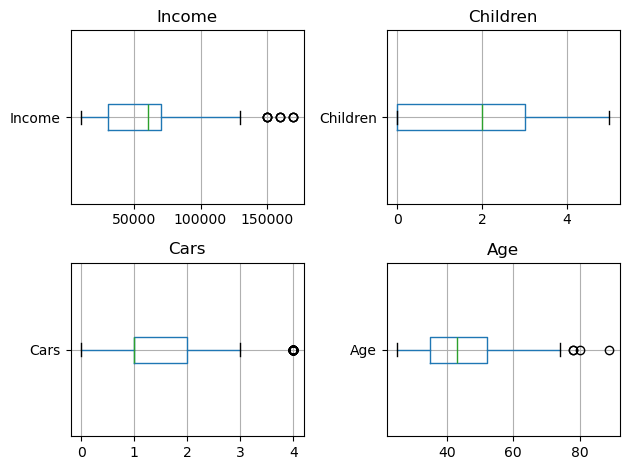

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)


df.boxplot(column='Income', ax=axes[0, 0], vert=False)
axes[0, 0].set_title('Income')
df.boxplot(column='Children', ax=axes[0, 1], vert=False)
axes[0, 1].set_title('Children')
df.boxplot(column='Cars', ax=axes[1, 0], vert=False)
axes[1, 0].set_title('Cars')
df.boxplot(column='Age', ax=axes[1, 1], vert=False)
axes[1, 1].set_title('Age')
plt.tight_layout()
plt.show()

The diagram above is to just show outliers. It is evident that outliers do exist, especially within age and income as we mentioned earlier. 

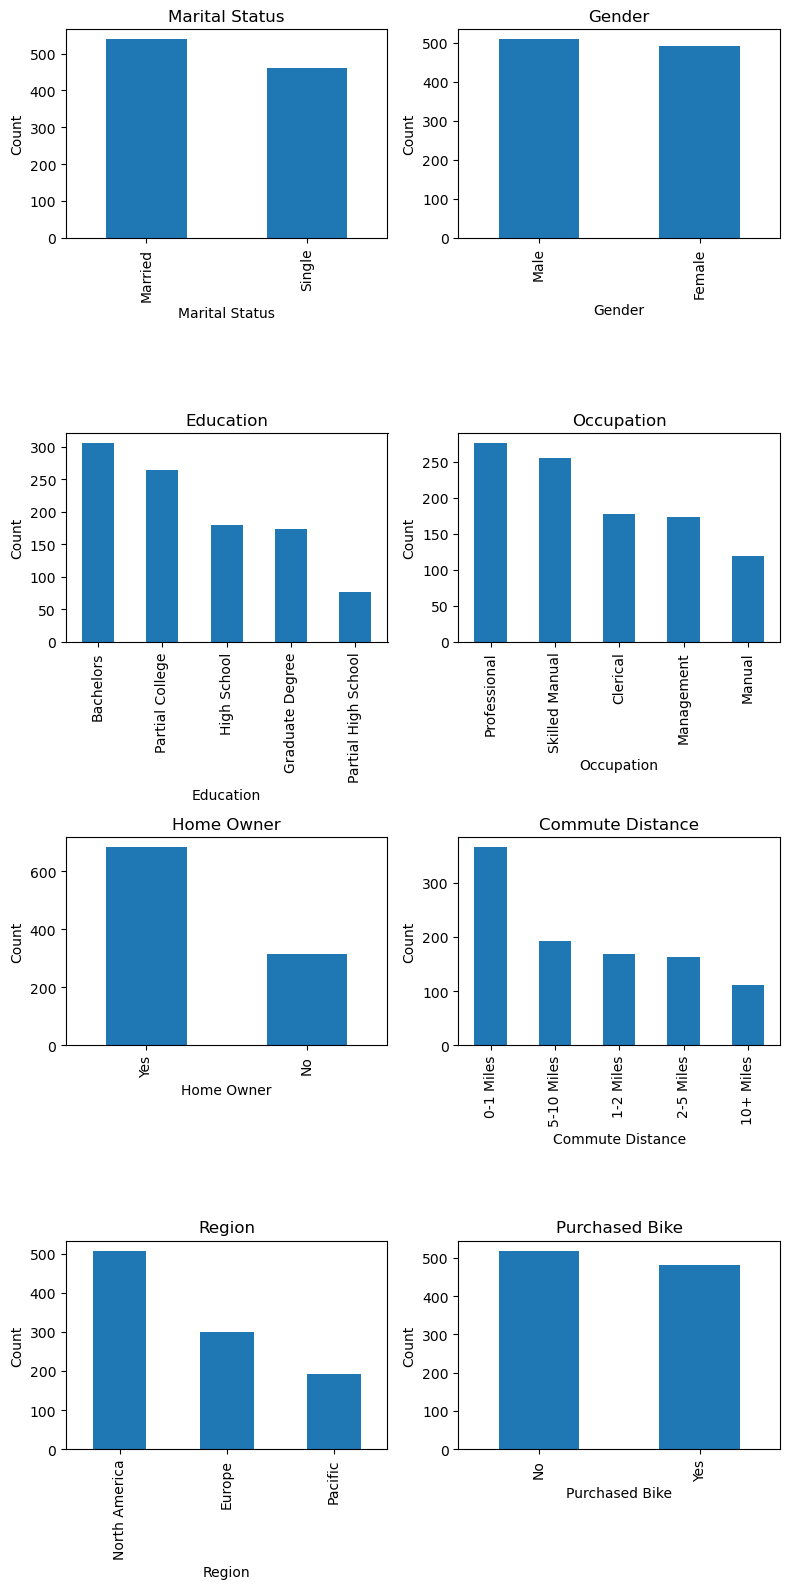

In [8]:
import matplotlib.pyplot as plt

categorical_vars = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 16))

#made a cool for loop to show all the categorical variables and compare
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    df[var].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(var)
    axes[row, col].set_ylabel('Count')
plt.tight_layout()
plt.show()


After looking at all the charts, the ones that are seemingly outweighing each individual category are the following: Home Owner (in favor of those owning a home), Education (in the sense that those with college, or partial college, are seemingly more likely to be buyers), Marital Status (though this one wasn't super in favor, it was a little interesting), Communte distance (this favored shorter distances significantly), and lastly Region (to no ones surprised North America was the highest ranked region).

Moving on to analyzing one statistical category - I will be analyzing Education - I’m really interested in how education level impacts bike purchasing decisions. For example, it would be fascinating to see if people with higher education levels are more likely to buy a bike or lower education levels would seemingly buy a bike.

In [9]:

df['Education'].value_counts()


Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

In [10]:
df['Education'].value_counts(normalize=True) * 100 #get percentages to better help visualize it

Education
Bachelors              30.6
Partial College        26.5
High School            17.9
Graduate Degree        17.4
Partial High School     7.6
Name: proportion, dtype: float64

I figured it would be helpful to at least review the data before delving hands first into it.

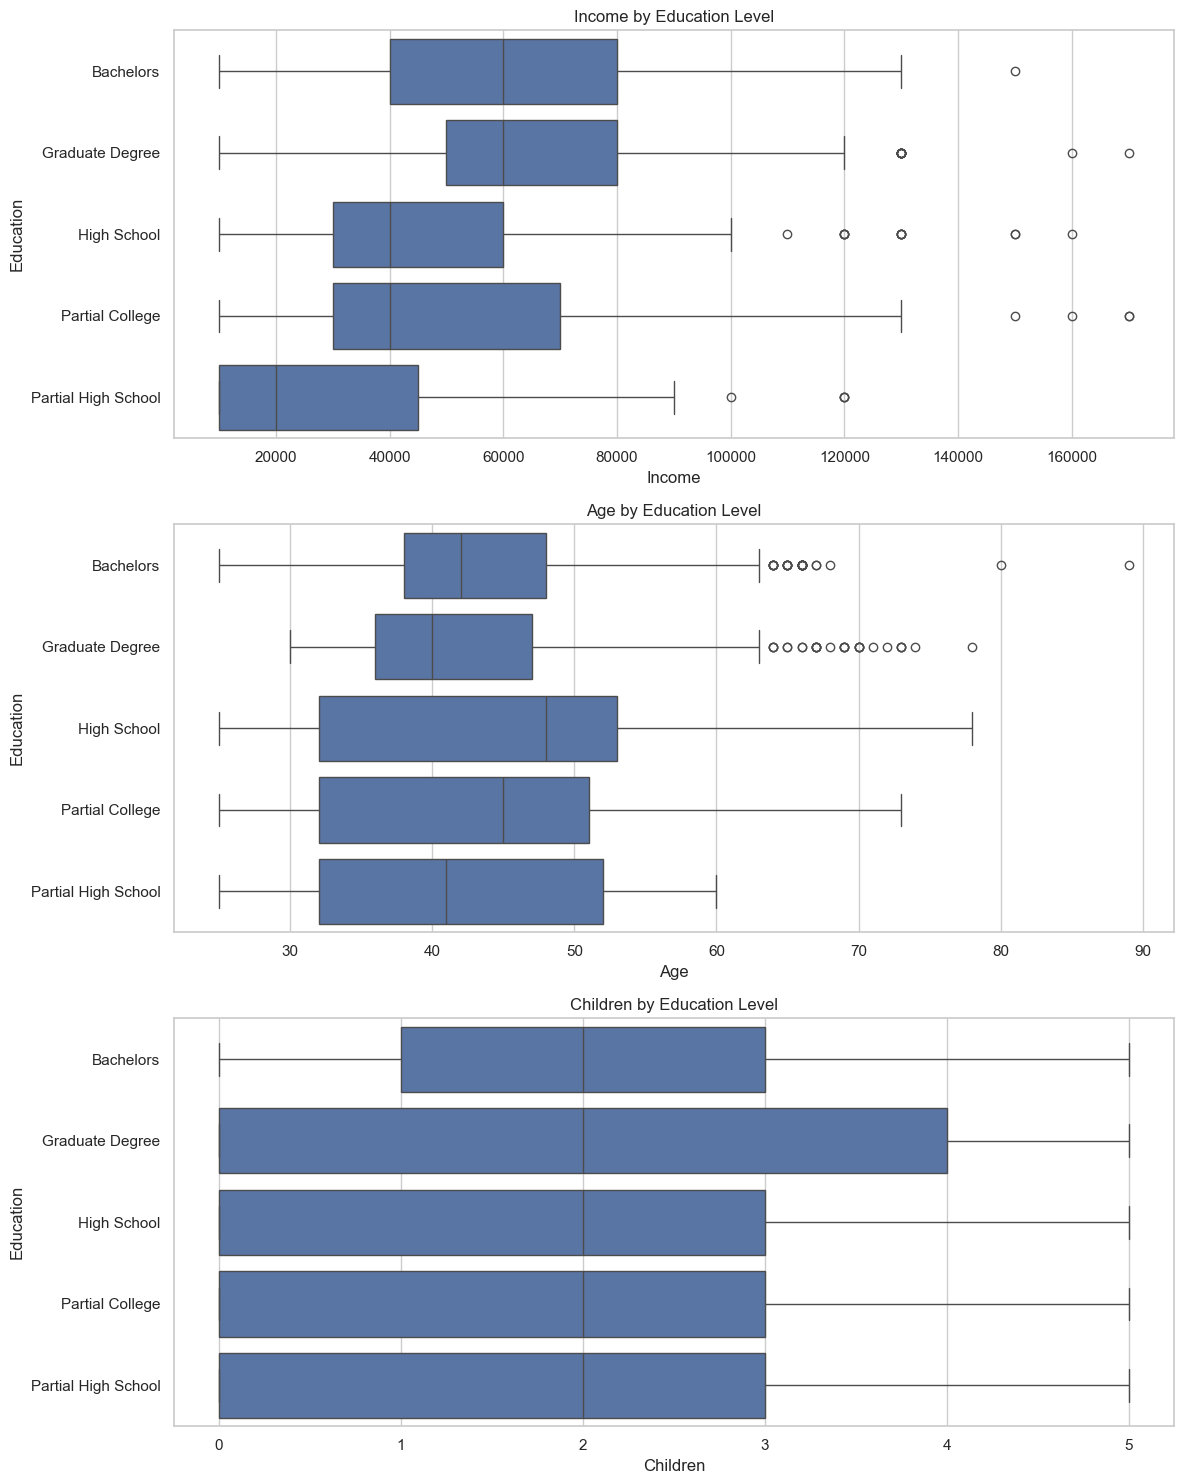

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

sns.boxplot(x='Income', y='Education', data=df, orient='h', ax=axes[0])
axes[0].set_title('Income by Education Level')

sns.boxplot(x='Age', y='Education', data=df, orient='h', ax=axes[1])
axes[1].set_title('Age by Education Level')
sns.boxplot(x='Children', y='Education', data=df, orient='h', ax=axes[2])
axes[2].set_title('Children by Education Level')


plt.tight_layout()
plt.show()


made a boxplot to understand the differences between the 5 categories of education

In [12]:
df.groupby('Education')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelors,306.0,62875.816993,26653.162765,10000.0,40000.0,60000.0,80000.0,150000.0
Graduate Degree,174.0,66091.954023,28339.654272,10000.0,50000.0,60000.0,80000.0,170000.0
High School,179.0,46815.642458,32350.339612,10000.0,30000.0,40000.0,60000.0,160000.0
Partial College,265.0,54339.622642,32033.921058,10000.0,30000.0,40000.0,70000.0,170000.0
Partial High School,76.0,34473.684211,30348.848933,10000.0,10000.0,20000.0,45000.0,120000.0


In [13]:
df.groupby('Education')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelors,306.0,45.307190,10.732382,25.0,38.0,42.0,48.0,89.0
Graduate Degree,174.0,44.655172,12.061334,30.0,36.0,40.0,47.0,78.0
High School,179.0,44.178771,11.655225,25.0,32.0,48.0,53.0,78.0
Partial College,265.0,43.218868,11.414920,25.0,32.0,45.0,51.0,73.0
Partial High School,76.0,42.039474,10.878040,25.0,32.0,41.0,52.0,60.0


In [14]:
df.groupby('Education')['Children'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelors,306.0,1.944444,1.649695,0.0,1.0,2.0,3.0,5.0
Graduate Degree,174.0,2.022989,1.723533,0.0,0.0,2.0,4.0,5.0
High School,179.0,1.949721,1.576776,0.0,0.0,2.0,3.0,5.0
Partial College,265.0,1.864151,1.584859,0.0,0.0,2.0,3.0,5.0
Partial High School,76.0,1.552632,1.543975,0.0,0.0,2.0,3.0,5.0


In [15]:
from scipy import stats


df['Education_num'] = df['Education'].astype('category').cat.codes
p_income = stats.pearsonr(df['Education_num'], df['Income'])
print(f'P-value for Income: {p_income[1]:}')

p_age = stats.pearsonr(df['Education_num'], df['Age'])
print(f'P-value for age: {p_age[1]:f}')

p_children = stats.pearsonr(df['Education_num'], df['Children'])
print(f'P-value for children: {p_children[1]:}')


P-value for Income: 2.3211061676028314e-13
P-value for age: 0.005437
P-value for children: 0.12084363973726987


As we see from the P-values, there is a significant correlation between income and education. For age, it is out of the range of under 0.05 to seriously justify a correlation; however, it would be good to revisit. In terms of children, it appears that there is no correlation. 

In [16]:
from statsmodels.stats.multicomp import MultiComparison


mc = MultiComparison(df.Income, df.Education)
print(mc.tukeyhsd())

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1            group2         meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------------------
      Bachelors     Graduate Degree    3216.137 0.7864  -4508.6284  10940.9025  False
      Bachelors         High School -16060.1745    0.0 -23715.8526  -8404.4965   True
      Bachelors     Partial College  -8536.1944 0.0059 -15363.2654  -1709.1233   True
      Bachelors Partial High School -28402.1328    0.0 -38829.2484 -17975.0171   True
Graduate Degree         High School -19276.3116    0.0 -27937.6744 -10614.9487   True
Graduate Degree     Partial College -11752.3314 0.0005 -19690.7632  -3813.8996   True
Graduate Degree Partial High School -31618.2698    0.0  -42804.625 -20431.9147   True
    High School     Partial College   7523.9802 0.0689   -347.2398  15395.2002  False
    High School Partial High School -12341.9582 0.0212

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

# Create a unique list of Education levels
e_types = df.Education.unique()
ttests = []

# Loop through that list
for i, e_t in enumerate(e_types):
    # Loop through a second list to compare each pair
    for i2, e_t2 in enumerate(e_types):
        if i2 > i:  # Compare only when inner_index is greater than outer_index
            type_1 = df[df.Education == e_t]
            type_2 = df[df.Education == e_t2]
            
            # Run t-test on Income for the two groups
            t, p = stats.ttest_ind(type_1['Income'], type_2['Income'], equal_var=False)
            
            # Add t-test result to the list
            ttests.append([e_t + ' - ' + e_t2, t.round(4), p.round(4)])
            
            # Print the t-test result for verification
            print(f'{e_t}/{e_t2}: t: {round(t, 2)}, p: {round(p, 2)}')

# The new threshold for statistical significance = 0.05 / length of the ttests list
p_threshold = 0.05 / len(ttests)
print(f'\nT-tests below p-value threshold: {p_threshold}')

# Iterate through the results list and print only those that are significant
for pair in ttests:
    if pair[2] <= p_threshold:  # p-value is in the third index
        print(pair)


Bachelors/Graduate Degree: t: -1.22, p: 0.22
Bachelors/High School: t: 5.62, p: 0.0
Bachelors/Partial College: t: 3.43, p: 0.0
Bachelors/Partial High School: t: 7.47, p: 0.0
Graduate Degree/High School: t: 5.96, p: 0.0
Graduate Degree/Partial College: t: 4.03, p: 0.0
Graduate Degree/Partial High School: t: 7.73, p: 0.0
High School/Partial College: t: -2.41, p: 0.02
High School/Partial High School: t: 2.91, p: 0.0
Partial College/Partial High School: t: 4.97, p: 0.0

T-tests below p-value threshold: 0.005
['Bachelors - High School', 5.6194, 0.0]
['Bachelors - Partial College', 3.4299, 0.0007]
['Bachelors - Partial High School', 7.4741, 0.0]
['Graduate Degree - High School', 5.9595, 0.0]
['Graduate Degree - Partial College', 4.0338, 0.0001]
['Graduate Degree - Partial High School', 7.7291, 0.0]
['High School - Partial High School', 2.9118, 0.0041]
['Partial College - Partial High School', 4.9678, 0.0]
